## FUNNEL ANALYSIS

In [32]:
## Loading the libraries 
import pandas as pd
import numpy as np


In [33]:
##Data load
users = pd.read_csv(r'C:\Users\Mohit\OneDrive\Desktop\assignment\Assignment For DA Candidates\Data Analyst Assignment Part 1\funnel-analysis\user_table.csv')
home_page = pd.read_csv(r'C:\Users\Mohit\OneDrive\Desktop\assignment\Assignment For DA Candidates\Data Analyst Assignment Part 1\funnel-analysis\home_page_table.csv')
search_page= pd.read_csv(r'C:\Users\Mohit\OneDrive\Desktop\assignment\Assignment For DA Candidates\Data Analyst Assignment Part 1\funnel-analysis\search_page_table.csv')
payment_page = pd.read_csv(r'C:\Users\Mohit\OneDrive\Desktop\assignment\Assignment For DA Candidates\Data Analyst Assignment Part 1\funnel-analysis\payment_page_table.csv')
payment_confirmation = pd.read_csv(r'C:\Users\Mohit\OneDrive\Desktop\assignment\Assignment For DA Candidates\Data Analyst Assignment Part 1\funnel-analysis\payment_confirmation_table.csv')


### Reading Data

In [34]:
users.head()

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male


In [35]:
##checking for duplicates
users['user_id'].nunique()

90400

In [36]:
home_page.head()


,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page
3,290784,home_page
4,639104,home_page


In [37]:
search_page.head()

,user_id,page
0,15866,search_page
1,347058,search_page
2,577020,search_page
3,780347,search_page
4,383739,search_page


In [38]:
payment_page.head()

,user_id,page
0,253019,payment_page
1,310478,payment_page
2,304081,payment_page
3,901286,payment_page
4,195052,payment_page


In [39]:
payment_confirmation.head()

,user_id,page
0,123100,payment_confirmation_page
1,704999,payment_confirmation_page
2,407188,payment_confirmation_page
3,538348,payment_confirmation_page
4,841681,payment_confirmation_page


### Ploting a funnel chart to see user conversion rate.

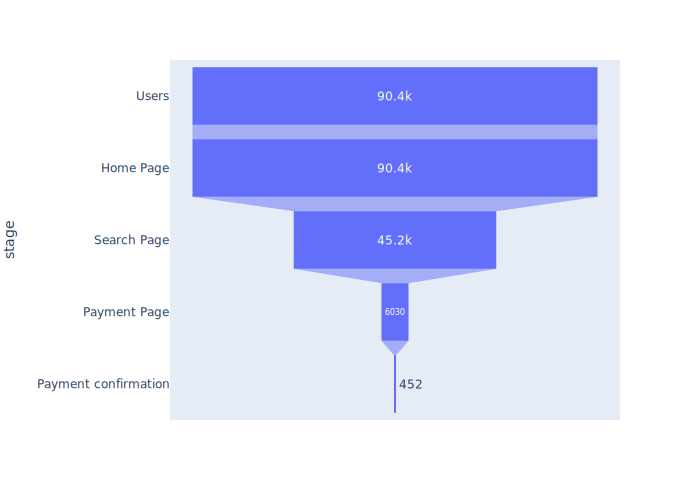

In [40]:
import plotly.express as px
data = dict(
    number=[users.count()[0],home_page.count()[0], search_page.count()[0], payment_page.count()[0], payment_confirmation.count()[0]],
    stage=["Users", "Home Page", "Search Page", "Payment Page", "Payment confirmation"])
fig = px.funnel(data, x='number', y='stage')
fig.show("svg")

#### As we can see that the conversion rate is only 0.5%. Need to Analyse for other factors.

### Joining all the datasets with users.

In [41]:
p = pd.merge(users,home_page, on='user_id', how='right')
c = pd.merge(users,search_page, on='user_id', how='right')
s = pd.merge(users,payment_page, on='user_id', how='right')
t = pd.merge(users,payment_confirmation, on='user_id', how='right')

### Analysing on the basis of Sex.

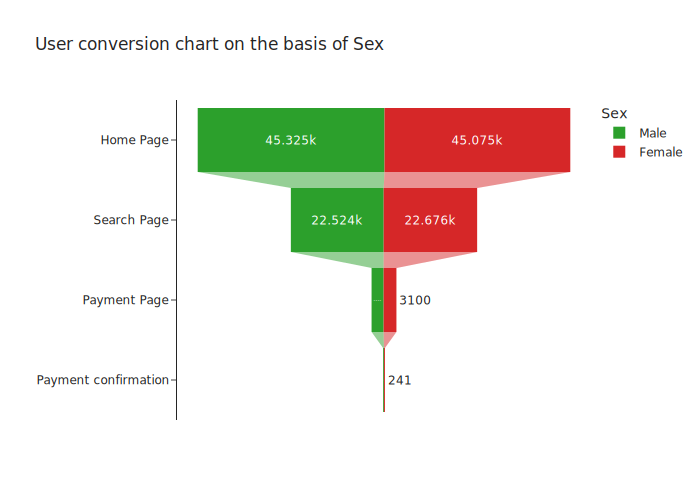

In [42]:
data = dict(Quantity=[p[p['sex']=='Male'].count()[0],c[c['sex']=='Male'].count()[0],s[s['sex']=='Male'].count()[0],t[t['sex']=='Male'].count()[0],p[p['sex']=='Female'].count()[0],c[c['sex']=='Female'].count()[0],s[s['sex']=='Female'].count()[0],t[t['sex']=='Female'].count()[0]],
    
            Stage=["Home Page", "Search Page", "Payment Page","Payment confirmation"]*2,
    
            Sex=['Male']*4 + ['Female']*4)
    
fig = px.funnel(data, y='Stage', x='Quantity', color='Sex',
                color_discrete_map={"Tatooine": "#374B53", 
                                    "Mandalore": "#617588"},
                template="simple_white",
                title='User conversion chart on the basis of Sex',
                labels={"Stage": ""})
fig.show("svg")

#### As we can see sex does not have any such impact on conversion rate, the ratio of both sexes is quite equal. Now we will check if device can provide us some conclusive detail.

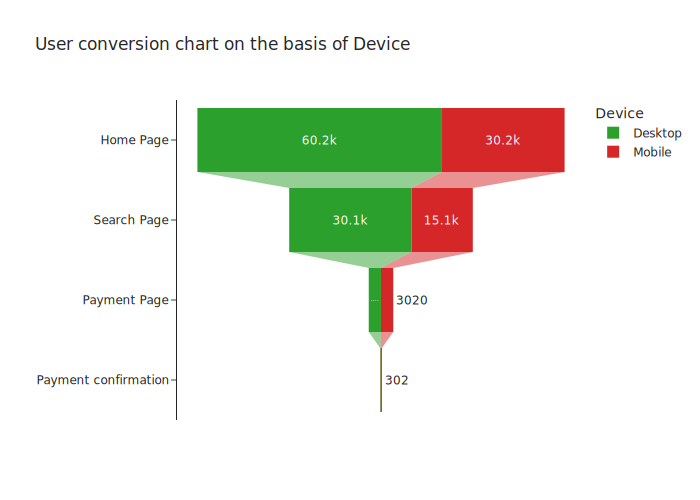

In [43]:
data = dict(Quantity=[p[p['device']=='Desktop'].count()[0],c[c['device']=='Desktop'].count()[0],s[s['device']=='Desktop'].count()[0],t[t['device']=='Desktop'].count()[0],p[p['device']=='Mobile'].count()[0],c[c['device']=='Mobile'].count()[0],s[s['device']=='Mobile'].count()[0],t[t['device']=='Mobile'].count()[0]],
    
            Stage=["Home Page", "Search Page", "Payment Page","Payment confirmation"]*2,
    
            Device=['Desktop']*4 + ['Mobile']*4)
    
fig = px.funnel(data, y='Stage', x='Quantity', color='Device',
                color_discrete_map={"Tatooine": "#374B53", 
                                    "Mandalore": "#617588"},
                template="simple_white",
                title='User conversion chart on the basis of Device',
                labels={"Stage": ""})
fig.show("svg")


### So, almost 2/3 users are desktop users however, the conversion rate of mobile app users is twice more than desktop users.

- ### The product team need to focus on the experience of their Desktop users specially on the payment page, as we have seen that both desktop and mobile app user's ratio was same on payment page but mobile app users confirmed payment twice more than desktop users.